In [1]:
from pandas import read_excel
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random
import timeit
import pickle

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm, tree    #https://scikit-learn.org/stable/modules/svm.html
                                 #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from modAL.models import ActiveLearner, Committee             #https://modal-python.readthedocs.io/en/latest/content/models/ActiveLearner.html
from modAL.disagreement import vote_entropy_sampling     #https://modal-python.readthedocs.io/en/latest/content/apireference/uncertainty.html

import sys
sys.path.insert(0, '/home/jovyan/Thesis_ActLearn_DOP_2022/main/active_learning/')
import functions as fun

In [1]:
# Loading data sets
full_data_BatchA = pd.read_csv('/home/jovyan/Thesis_ActLearn_DOP_2022/main/active_learning/data/full_data_BatchA.csv')
y = full_data_BatchA['Label'].to_numpy()
X_morgan = full_data_BatchA.drop(['Label'], axis = 1).to_numpy()

# Creating classifiers with only default values exept random state for replications
svm_clf1 = svm.SVC(random_state = 0, probability=True)
knn_clf1 = KNeighborsClassifier(n_jobs=-1)
rf_clf1 = RandomForestClassifier(max_depth=10, random_state=0, n_jobs = -1)
ada_clf1 = AdaBoostClassifier(n_estimators=10, random_state=0)

# Parameters for ML model
train_size = 0.05
test_size = 0.3

#Generating test, training and pool
x_train, y_train, x_test, y_test, x_pool, y_pool = fun.split(x_dataset=X_morgan, y_dataset= y,
                                                             ini_train_size= train_size, test_size=test_size)

In [3]:
# ------------------- ACTIVE LEARNING -------------------

# Parameters for AL
N_QUERIES = 1 # int(2*len(x_pool)/3)
# Creating the committee form a list of ActiveLearners:
learners1 = [svm_clf1, knn_clf1, rf_clf1]
committiees = [learners1]
query_strategy = vote_entropy_sampling

# Timer
tic = timeit.default_timer()

cf_mat_x_classifr = []
save = True
count = 0
for lista in committiees:

    print(f'Training with committee {list}')

    _, cf_mat_his, committee = fun.active_learnig_train_committee(n_queries = N_QUERIES, x_train=x_train, y_train = y_train,
                                                              x_test = x_test, y_test = y_test, x_pool = x_pool, y_pool = y_pool,
                                                              classifiers_list = lista, query_str = query_strategy)
    cf_mat_x_classifr.append(cf_mat_his)

    # Saving model
    if save:
        filename = "".join(["home/jovyan/Thesis_ActLearn_DOP_2022/main/active_learning/qbc_experiments/qbc_entropy_default_models/committe",str(count),".sav"])

    count += 1

print('Finally done!!!')

Training with committee <class 'list'>
Accuracy after query 1: 0.9903
Finally done!!!


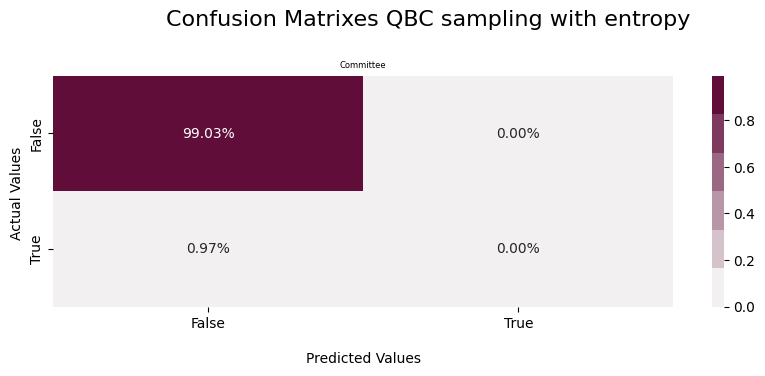

In [2]:
#Plot
fig, axes = plt.subplots(1, 1, figsize=(10,3))
fig.suptitle('Confusion Matrixes QBC sampling with entropy\n', fontsize=16, y =1.1)
fun.plot_cf_mat(matrix = cf_mat_x_classifr[0][-1], sub_title = 'Committee' ,save = False, figure_name = None)
plt.show()